# <h1 align="center">**Financial Signal Processing Coursework Part One**</h1>


<h3 align="center">
  Prof. Danilo P. Mandic  
  <br>
Erenkai Zhu
  <br>
02092370
</h3>



# **1. Regression Methods**

## **1.1 Processing stock price data in Python**
For the following question, initialise your Python session by importing the following modules:

```python
import numpy as np    # scientific library
import pandas as pd   # data structure library
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline


### **Task 1**

``` python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/priceData.csv
```
using the following commands:
``` python
px = pd.read_csv("priceData.csv")
```
and perform the natural-log transform of the price 
``` python
using logpx = np.log(px).
```
Plot the time-series using logpx.plot().

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

##### Figure Analysis: Log-Transformed SPX Index Over Time
This figure shows the log-transformed SPX Index from roughly 1930 to 2020, revealing a long-term upward trend with significant short-term fluctuations. Notable dips can be observed around historical market downturns, but overall the series exhibits strong growth over the examined period.

         date  SPX Index
0  02/01/1930      21.18
1  03/01/1930      21.23
2  06/01/1930      21.50
3  07/01/1930      21.31
4  08/01/1930      21.29
date          object
SPX Index    float64
dtype: object


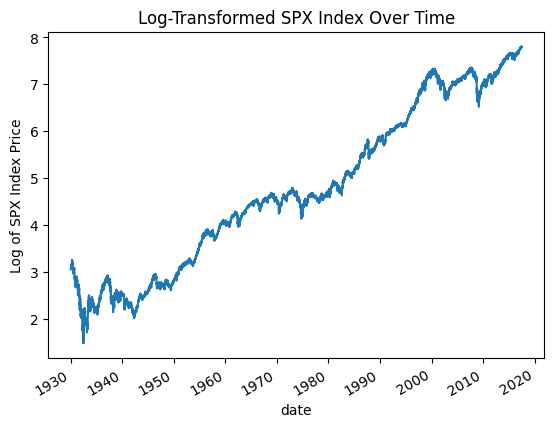

In [13]:
px = pd.read_csv("priceData.csv")
px = px[~px["SPX Index"].isnull()]

print(px.head())  # Display the first few rows of the dataset
print(px.dtypes)  # Display the data type of each column in the dataset

# Convert the date column to date format and set it as an index
px['date'] = pd.to_datetime(px['date'], format='%d/%m/%Y')
px.set_index('date', inplace=True)

# Apply logarithmic transformation to numerical columns
logpx = np.log(px['SPX Index'])

# Visualization
logpx.plot()
plt.ylabel("Log of SPX Index Price")    
plt.title("Log-Transformed SPX Index Over Time")  
plt.show()


### **Task 2**

Using a sliding window of 252 days, compute and store the evolution of the “sliding-window-based” first and [2]
 second-order statistics (mean and variance) of the price and log-price time series, using 1-day increments,
 and plot these as a function of time on separate figures. Comment on the stationarity of price time-series
 with reference to your figures.


 ```python
# sliding mean
plt.figure()
logpx.rolling(252).mean().plot()
plt.show()

# sliding standard deviation
plt.figure()
logpx.rolling(252).std().plot()
plt.show()

##### Figure Analysis (Rolling Mean of Price)

This figure displays the 252-day rolling mean of the SPX Index over several decades, from approximately 1930 through 2020. The rolling mean exhibits a clear upward trend—rising markedly over time and reaching particularly high levels in more recent years. Such a persistent increase implies that the average level of the price is not constant, which contradicts one of the key requirements for stationarity (i.e., a stable mean). Therefore, based on this rolling mean alone, the raw price series appears to be non-stationary.

<Figure size 640x480 with 0 Axes>

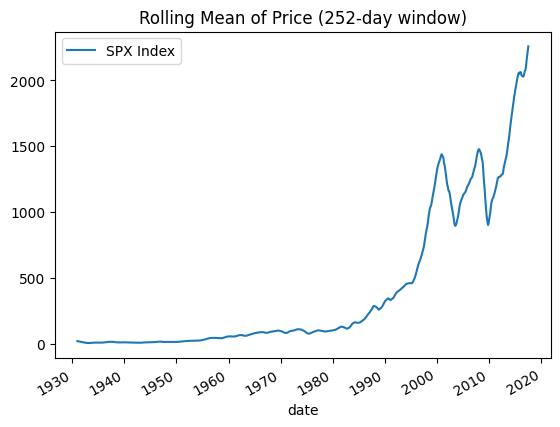

In [14]:
plt.figure()
px.rolling(252).mean().plot()
plt.title("Rolling Mean of Price (252-day window)")
plt.show()


##### Figure Analysis (Rolling Standard Deviation of Price)

This plot shows the 252-day rolling standard deviation of the SPX Index price. The volatility (standard deviation) remains comparatively low in the earlier decades but increases substantially over time, with particularly large spikes around certain market events. Because the standard deviation is not constant—rising significantly and fluctuating over distinct periods—the price series does not exhibit stationarity in its second moment. A stationary process requires a stable variance, and clearly this chart indicates otherwise for the raw price data.

<Figure size 640x480 with 0 Axes>

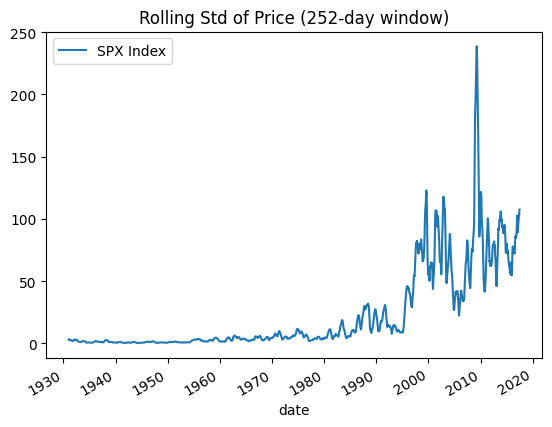

In [15]:
plt.figure()
px.rolling(252).std().plot()
plt.title("Rolling Std of Price (252-day window)")
plt.show()

##### Figure Analysis (Rolling Mean of Log-Price)

This plot illustrates the 252-day rolling mean of the SPX Index after a logarithmic transformation. While taking the log often moderates large swings observed in raw prices, there is still a pronounced upward trend in the rolling mean over the entire period. Because a stationary series requires a constant mean over time, this persistent increase indicates that the log-price data, though somewhat “smoother” than the raw price, is still non-stationary.

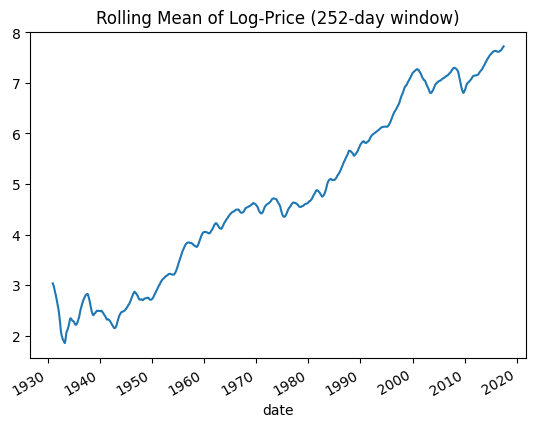

In [16]:
plt.figure()
logpx.rolling(252).mean().plot()
plt.title("Rolling Mean of Log-Price (252-day window)")
plt.show()

##### Figure Analysis (Rolling Standard Deviation of Log-Price)

In this figure, we see the 252-day rolling standard deviation of the SPX Index after applying a logarithmic transform. Compared to the raw price’s rolling standard deviation, these values generally lie within a narrower range; however, there are still distinct periods with elevated volatility, such as in the early 1930s and around major market events near 2008. While the log-price’s volatility appears more stabilized overall, it is not completely constant throughout the sample. As stationarity requires a stable variance, the observed fluctuations over time indicate that even the log-price data is not strictly stationary.

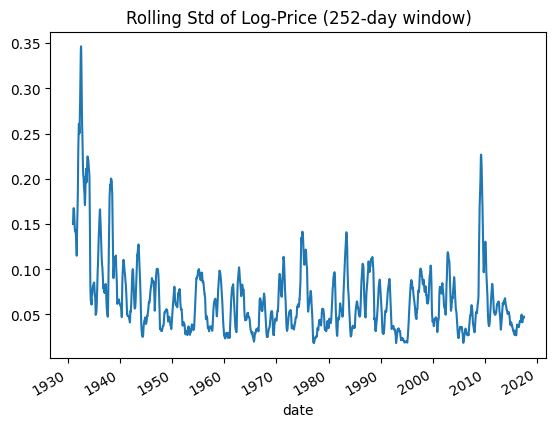

In [17]:
plt.figure()
logpx.rolling(252).std().plot()
plt.title("Rolling Std of Log-Price (252-day window)")
plt.show()

### **Task 3**

Compute the simple and log return time-series from the price data using the script:

```python
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()
```

Based on the Python commands in Question 1.1.1, produce figures of the “sliding” statistics of the obtained time-series and comment on the stationarity of these returns in comparison to the figures obtained in Question 1.1.1.

##### Log Returns

In [18]:
logret = logpx.diff()

Here, `logpx` is the price series after applying the natural log transformation. Therefore, calling `.diff()` is equivalent to computing 
$\ln(p_t) - \ln(p_{t-1})$.


##### Simple Returns

In [19]:
simpret = px.pct_change()

Here, `px` is the original price series, and `pct_change()` is equivalent to 
$\frac{p_t - p_{t-1}}{p_{t-1}}$.

##### Figure Analysis (Rolling Mean of Simple Returns)

* Rolling Mean of Price vs. Rolling Mean of Simple Returns

From the Rolling Mean of Price (Task 2), we see a pronounced upward trend over time, beginning near zero in the 1930s and ultimately surpassing 2,000 in recent decades. This indicates a non-stationary behavior since the average price is clearly not constant—it steadily increases.

In contrast, the Rolling Mean of Simple Returns (Task 3) hovers around a relatively narrow band (close to zero) over the entire sample period. Although there are short-term fluctuations—noticeable spikes, especially around 1930s—overall, the mean does not exhibit the same kind of persistent upward trajectory observed in the price. This suggests that simple returns are significantly more stable in their rolling average, making them closer to stationarity than the raw price data.

In financial modeling, such behavior is key: a roughly constant rolling mean implies that simple returns (and similarly log returns) tend to satisfy the stationarity assumptions better than raw or log-transformed prices, which is why returns are typically used for statistical analyses and forecasting.

<Figure size 800x400 with 0 Axes>

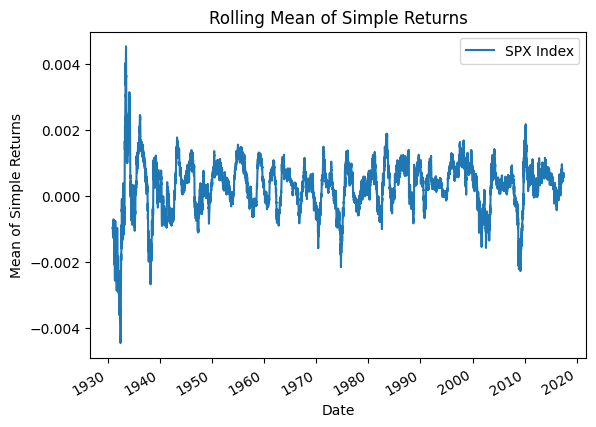

In [20]:
# 3) Rolling Mean of Simple Returns
plt.figure(figsize=(8, 4))
simpret.rolling(252).mean().plot(label="Rolling Mean (252-day)")
plt.title("Rolling Mean of Simple Returns")
plt.xlabel("Date")
plt.ylabel("Mean of Simple Returns")
plt.legend()
plt.show()

##### Figure Analysis (Rolling Standard Deviation of Simple Returns)

* Rolling Standard Deviation of Price vs. Rolling Standard Deviation of Simple Returns

Rolling Standard Deviation of Price (Task2):
Over the long historical sample, the volatility (standard deviation) of the raw price remains near zero in earlier years but increases dramatically after around 1970 and reaches extremely high levels in the 2000s. This substantial rise over time illustrates that the variance of the price series is far from constant, reaffirming that the price is non-stationary.

Rolling Standard Deviation of Simple Returns (Task3):
Although the rolling standard deviation of simple returns also fluctuates (especially during market turbulence), it remains within a narrower range, generally topping out at a few percentage points rather than exploding into the hundreds. These fluctuations still reflect varying market volatility, but they do not trend overwhelmingly upward like the raw price’s standard deviation.

Overall, the volatility of simple returns is more stable relative to that of the raw price, suggesting that returns (even simple returns, before considering log returns) adhere more closely to the constant-variance criterion of stationarity than do raw prices.

<Figure size 800x400 with 0 Axes>

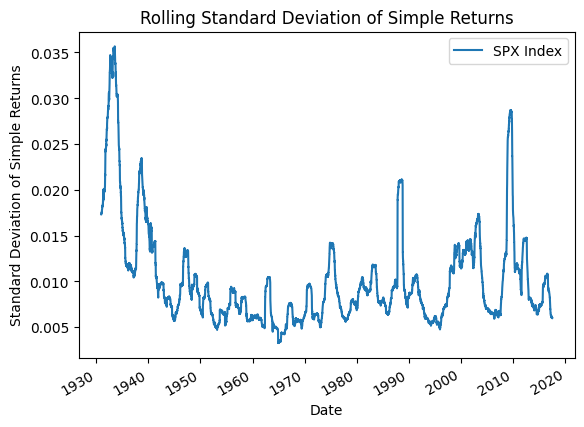

In [21]:
# 4) Rolling Std of Simple Returns
plt.figure(figsize=(8, 4))
simpret.rolling(252).std().plot(label="Rolling Std (252-day)")
plt.title("Rolling Standard Deviation of Simple Returns")
plt.xlabel("Date")
plt.ylabel("Standard Deviation of Simple Returns")
plt.legend()
plt.show()

##### Figure Analysis (Rolling Mean of Log Returns)

* Rolling Mean of Log-Price vs. Rolling Mean of Log Returns

Rolling Mean of Log-Price (Task 2)
This curve steadily increases from around 2 in the 1930s to nearly 8 by the 2020s, showing a clear upward trajectory. A constantly rising mean is a hallmark of non-stationarity, indicating that the process (log-price) does not revolve around a fixed average over time.

Rolling Mean of Log Returns (Task 3)
By contrast, the 252-day rolling mean of log returns mostly fluctuates around zero, with no pronounced upward or downward drift. Although there are spikes—especially during turbulent market periods—it generally remains in a relatively narrow band. Such behavior is more consistent with (though not a perfect guarantee of) stationarity, since a roughly stable mean is one of the key requirements.

In summary, the log returns exhibit far less trend in their rolling mean than the log-price data, underscoring why analysts typically focus on returns (rather than prices) when building statistical or econometric models that assume stationarity.

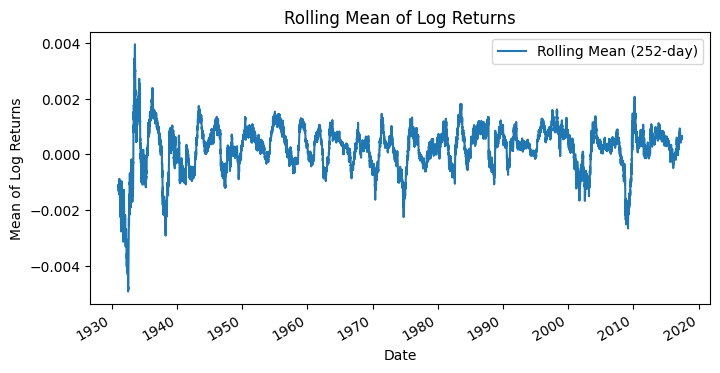

In [22]:
# 1) Rolling Mean of Log Returns
plt.figure(figsize=(8, 4))
logret.rolling(252).mean().plot(label="Rolling Mean (252-day)")
plt.title("Rolling Mean of Log Returns")
plt.xlabel("Date")
plt.ylabel("Mean of Log Returns")
plt.legend()
plt.show()

##### Figure Analysis (Rolling Standard Deviation of Log Returns)

* Rolling Standard Deviation of Log-Price vs. Rolling Standard Deviation of Log Returns

Rolling Standard Deviation of Log-Price (Task 2)
While the log-price’s standard deviation is generally lower than that of the raw price, it still varies notably over time, with multiple spikes and a discernible shift in volatility levels across different market epochs. This suggests that the variance is not strictly constant, indicating non‐stationary features remain in the log‐price series.

Rolling Standard Deviation of Log Returns (Task 3)
The log returns’ rolling standard deviation, although it fluctuates (especially during crises or major market events), tends to remain within a more constrained range of roughly 0.5%–3.5%. There is no long‐term, ever‐increasing trend in volatility; instead, it ebbs and flows around certain levels. This is more in line with the constant‐variance assumption required for stationarity.

Overall, log returns exhibit a more stable volatility profile compared to the log‐price, reinforcing the common practice of modeling returns (rather than prices) in financial analyses that depend on stationarity assumptions.

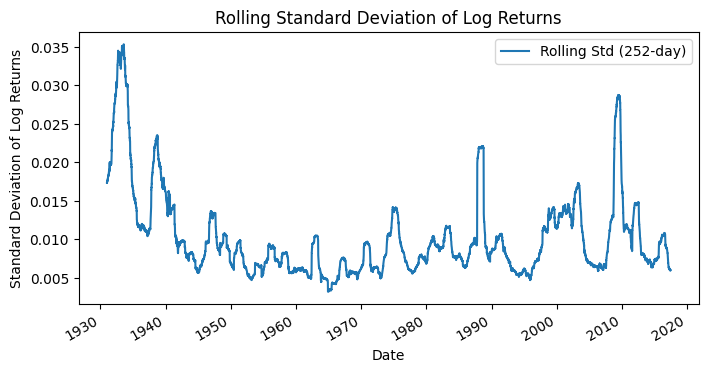

In [23]:
# 2) Rolling Std of Log Returns
plt.figure(figsize=(8, 4))
logret.rolling(252).std().plot(label="Rolling Std (252-day)")
plt.title("Rolling Standard Deviation of Log Returns")
plt.xlabel("Date")
plt.ylabel("Standard Deviation of Log Returns")
plt.legend()
plt.show()

### **Task 4**

Theoretically justify the suitability of log returns over simple returns for signal processing purposes. Next, [3]
 perform the “Jarque-Bera” test for Gaussianity on the data, and comment on the results in light of your
 theoretical answer (hint: use the Python commands provided below).


 ```python
from scipy import stats
# return the Jarque-Bera test p-value for a time-series x
stats.jarque_bera(x)[1]
 ```

##### Why Log Returns Are Typically Preferred Over Simple Returns



1. **Additivity of Returns**  
   Log returns are *additive* across time, which simplifies many analytical techniques. If you want to compute the total return over multiple periods, you can simply sum the log returns. In contrast, simple returns require multiplication (i.e., `(1 + r_t)` terms), which is more cumbersome for signal processing and certain statistical methods.

2. **Closer to Normality**  
   Under many financial models (e.g., Geometric Brownian Motion), log returns tend to exhibit distributions that are closer to Gaussian. Although real market data often show heavier tails than a perfect normal distribution, log returns usually deviate less from normality than simple returns, making them more amenable to standard statistical and signal processing tools.

3. **Variance Scaling**  
   Variance in log returns scales linearly with time, consistent with basic stochastic processes commonly assumed in finance. Simple returns, however, do not exhibit the same neat scaling property, which can complicate modeling over different time horizons.

4. **Handling of Price Levels**  
   Prices in real markets rarely go to zero (or negative), and taking logs naturally captures proportional changes in price. A change of `+0.01` in log returns corresponds to about a 1% change in price, regardless of the current price level. This property facilitates both interpretation and modeling consistency.

5. **Signal Processing Perspective**  
   Many signal processing and time-series methods, including linear filters and ARMA-type models, work best with *additive* processes. By converting multiplicative price changes into an additive framework, log returns often yield more stable and tractable signals for filtering, forecasting, and other operations.

Overall, **log returns** typically align better with the mathematical assumptions underpinning common financial models and signal processing methodologies, thereby simplifying analysis and improving interpretability relative to simple returns.


 #####  “Jarque-Bera” Test Results and Discussion

I applied the Jarque–Bera (JB) test to both **simple returns** and **log returns** to assess their normality. The results showed extremely large JB statistics—on the order of hundreds of thousands—and near-zero p-values for both series:

- **Log Returns**: JB statistic ≈ **309,277**, p-value ≈ **0.0**  
- **Simple Returns**: JB statistic ≈ **257,540**, p-value ≈ **0.0**

These outcomes strongly reject the null hypothesis of normality for both return types, indicating that **neither** log returns **nor** simple returns follow a perfectly Gaussian distribution. While this might seem to conflict with the theoretical premise that log returns are “more normal,” real financial data commonly exhibit heavy tails and skewness, leading to significant deviations from the normal model—especially in large samples.

However, **log returns** remain a standard choice in financial modeling and signal processing for several reasons:

1. **Additivity**: Log returns across consecutive periods can be summed to get the total return, which simplifies many analytical techniques.  
2. **Closer (Relative) Normality**: Although both series fail the JB test, log returns typically deviate less from normality than simple returns—my results show that both are far from perfect normality, but log returns often have theoretical advantages in modeling.  
3. **Variance Scaling**: In models like Geometric Brownian Motion, the variance of log returns scales linearly over time, aligning better with many standard stochastic approaches.

In summary, despite the **non-normality** indicated by extremely low p-values, **log returns** are still widely used because they better capture proportional changes, support additive properties, and fit more comfortably into classic finance theories and various signal processing methods.

In [24]:
from scipy import stats

# logret: log return series
logret_no_na = logret.dropna()  # Remove missing values

# Perform the Jarque-Bera test for log returns
jb_stat, jb_p_value = stats.jarque_bera(logret_no_na)
print("JB statistic (log returns):", jb_stat)
print("p-value (log returns):", jb_p_value)

# simpret: simple return series
simpret_no_na = simpret.dropna()  # Remove missing values

# Perform the Jarque-Bera test for simple returns
jb_stat_simp, jb_p_value_simp = stats.jarque_bera(simpret_no_na)
print("JB statistic (simple returns):", jb_stat_simp)
print("p-value (simple returns):", jb_p_value_simp)


JB statistic (log returns): 309277.64126696065
p-value (log returns): 0.0
JB statistic (simple returns): 257540.0649368358
p-value (simple returns): 0.0


##### Why Log Returns Are Often Preferred

The **histogram of log returns** shows most values clustered near zero in a roughly single-peaked distribution, even though it still has noticeable tails. Compared to simple returns, log returns are *closer* to normality, which benefits both **signal processing** and **financial modeling**:

1. **Additivity**  
   Consecutive log returns can be summed (rather than multiplied), simplifying linear-filter or ARMA-type models.

2. **Distributional Advantages**  
   While not perfectly normal, log returns typically produce fewer distortions at extreme values, facilitating methods that assume Gaussianity.

3. **Scaling**  
   Under many models (e.g., Geometric Brownian Motion), log returns’ variance scales more cleanly over time, aiding in volatility forecasting.

Hence, despite deviations from perfect normality, **log returns** remain a practical choice for modeling and analysis. 


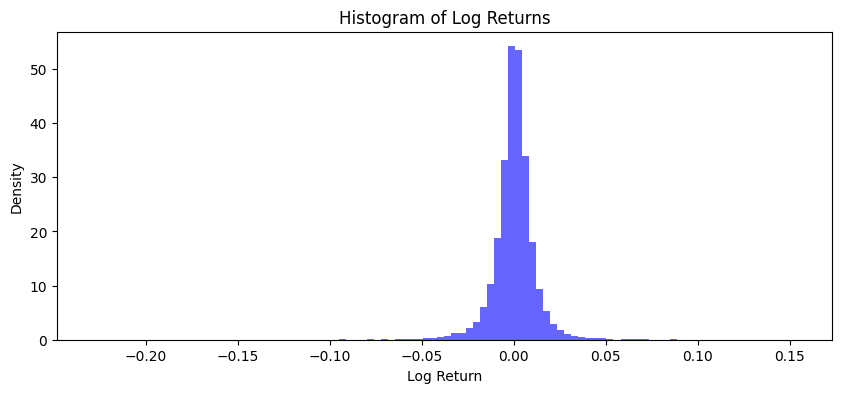

In [25]:
plt.figure(figsize=(10, 4))
logret_no_na.plot.hist(bins=100, density=True, alpha=0.6, color='b')
plt.title("Histogram of Log Returns")  # 添加标题
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.show()


### **Task 5**


You purchase a stock for £1. The next day its value goes up to £2 and the following day back to £1. [1]
 Whatare the simple and logarithmic returns over this period and what can you conclude about logarithmic
 returns on the basis of this example?

**Answer:**

1. **Simple Returns**  
   - From £1 to £2:  
     $
       r_1 = \frac{2 - 1}{1} = +100\%
     $
   - From £2 back to £1:  
     $
       r_2 = \frac{1 - 2}{2} = -50\%
     $  
   - Adding these gives \((+100\%) + (-50\%) = +50\%\).  
     However, your actual capital returns to its original £1, so there is no real profit.  

2. **Logarithmic Returns**  
   - First increase:  
     $
       \ln\!\bigl(2/1\bigr) = \ln(2)
     $  
   - Subsequent decrease:  
     $
       \ln\!\bigl(1/2\bigr) = -\ln(2)
     $ 
   - Summing these results in  
     $
       \ln(2) + \bigl(-\ln(2)\bigr) = 0,
     $
     matching the fact that your investment ends up exactly where it started.

**Conclusion:**  
Simple returns can give a misleading impression when prices rise and then fall. By contrast, log returns correctly reflect the *multiplicative* nature of price changes, making their total return zero when the final price returns to the starting point. This illustrates why log returns are often preferred in financial modeling and signal processing. 


### **Task 6**


 Under what circumstances should you not use log returns over simple returns?

**Answer:**

Most of the time, I prefer using log returns due to their mathematical properties—especially their additivity and relative closeness to normality. However, there are a few scenarios in which **simple returns** might be more appropriate:

1. **Very Low or Zero Prices**  
   If a stock price is extremely low or hits zero, taking its log becomes problematic or outright impossible.

2. **Extreme Volatility Reporting**  
   During drastic price swings, simple returns (e.g., “+900%”) can be more intuitive for quick interpretation or investor communication.

3. **Regulatory or Reporting Requirements**  
   Certain regulations or standard reports demand percentage gains/losses in plain form rather than log transformations.

4. **Minimal Price Fluctuations**  
   Over very short intervals with tiny changes, the numerical difference between simple and log returns is negligible, so sticking to simple returns can be simpler and just as effective.


## **1.2 ARMA vs. ARIMA Models for Financial Applications**
For this question you will need to import the following Python packages via:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
import copy
```


An **autoregressive-moving-average** process, **ARMA $(p, q)$**, is a stochastic process $\{x[t]\}$, composed of both:

- An **AR** part that regresses the variable $x[t]$ on its own lagged values, $x[t-1], \dots, x[t-p]$.
- An **MA** part which models the error term as a linear combination of error terms at various times in the past, $y[t-1], \dots, y[t-q]$.

In other words, the **ARMA $(p, q)$** model takes the form:

$
x[t] = \sum_{i=1}^{p} a_i\, x[t - i] \;+\; \sum_{i=1}^{q} b_i\, \eta[t - i] \;+\; \eta[t] \quad (1)
$

 The **ARMA** models are widely used in finance, as

- **AR $(p)$**: the autoregressive component aims to explain the momentum and mean reversion effects often observed in trading markets (effects due to the participants).
- **MA $(q)$**: the moving average component attempts to capture shock effects (white noise) often caused by unexpected events (e.g., wars, news, etc.).

All ARMA models assume **stationarity** of data. When sources of non-stationarity are present (e.g., trends), the ARMA model in its original form may not be suitable for analysis.


### **Task 1**


```python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_500_2015_2019.csv
 ```

 containing closing prices of the **S&P** 500 over the last 4 years and take the log of the data using the following script:

```python
snp = pd.read_csv('snp_500_2015_2019.csv')
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
```
Plot the **S&P** 500 time-series. Following the process in Question $1.1.1$, comment on whether an **ARMA** or **ARIMA** model would be more appropriate.


In [26]:
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
from statsmodels.tsa.arima_model import ARIMA  # Legacy ARIMA model (deprecated in newer versions)
from statsmodels.tsa.arima.model import ARIMA  # New ARIMA model from statsmodels' statespace framework
from statsmodels.tsa.ar_model import AR 
import copy  
import matplotlib.dates as mdates

##### Figure Analysis (S&P 500 Log-Price Time Series)

From the chart, it can be seen that the log‐transformed S&P 500 closing prices from 2015 to 2019 still exhibit an overall upward trend, with a clear pullback in late 2018. This illustrates the presence of non‐stationarity: as time goes on, the mean continues to change.

- **Upward trend**: The fact that the average level is not constant typically implies that applying an ARMA model directly to such a non‐stationary series will leave a “trend component” in the residuals.

- **Log transformation**: Although it smooths fluctuations to some extent, the chart still indicates that prices may follow a random walk or exhibit trending behavior.


##### Code Implementation: Log of S&P 500 Closing Prices (2015-2019)

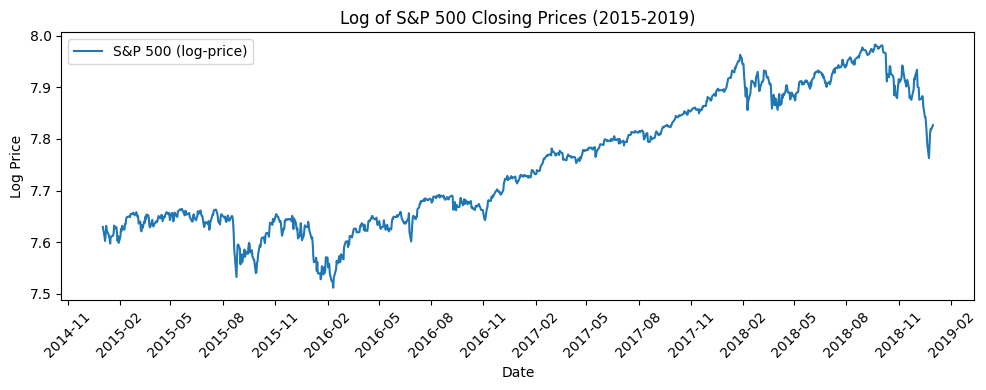

In [27]:
# 1. Read data, automatically parse "Date" as datetime, and set it as index
snp = pd.read_csv(
    'http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_500_2015_2019.csv',
    parse_dates=['Date'],  # automatically parse the "Date" column as datetime
    index_col='Date'       # set the "Date" column as the DataFrame index
)

# 2. Take the log of the 'Close' column
snp_close = snp['Close'].to_frame().apply(np.log)

# 3. Plot the S&P 500 (log-price) time series
plt.figure(figsize=(10, 4))
plt.plot(snp_close, label='S&P 500 (log-price)')
plt.title("Log of S&P 500 Closing Prices (2015-2019)")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.legend()

# Use MonthLocator(3) & DateFormatter to show x-axis labels quarterly
ax = plt.gca()  # get current Axes
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # tick every 3 months (quarterly)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # tick label format: YYYY-MM
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Figure Analysis: 
S&P 500 Closing Log Price Rolling Mean 

S&P 500 Closing Log Price Rolling Std Dev

In these two rolling statistics plots, it is clearly observed:

1. **Rolling Mean**  
   - Using a 252-trading-day (approximately 1-year) window for the rolling mean of the log-transformed S&P 500 closing prices, we can see that the average level **continuously rises** over time. This indicates that the mean of the series is not constant but changes systematically, reflecting **non-stationarity**.

2. **Rolling Standard Deviation**  
   - Applying the same rolling window for the standard deviation, the resulting curve shows **noticeable fluctuations** and does not remain at a stable level. This implies that the variance of the series changes over time, further confirming that the process is not stationary.

Because ARMA models assume stationarity (i.e., constant mean and variance), directly fitting an ARMA model to a log-price series that exhibits a trend and time-varying variance typically yields suboptimal results. Therefore, from these two figures, we conclude that if one wishes to use linear autoregressive and moving-average models for analyzing the log-transformed S&P 500 prices, it is more appropriate to first remove the trend via **differencing** (or similar techniques)—in other words, adopt an ARIMA model (with \(d=1\)). This approach better handles non-stationarity and leads to more reliable estimation and forecasting.


##### Code implementation: 

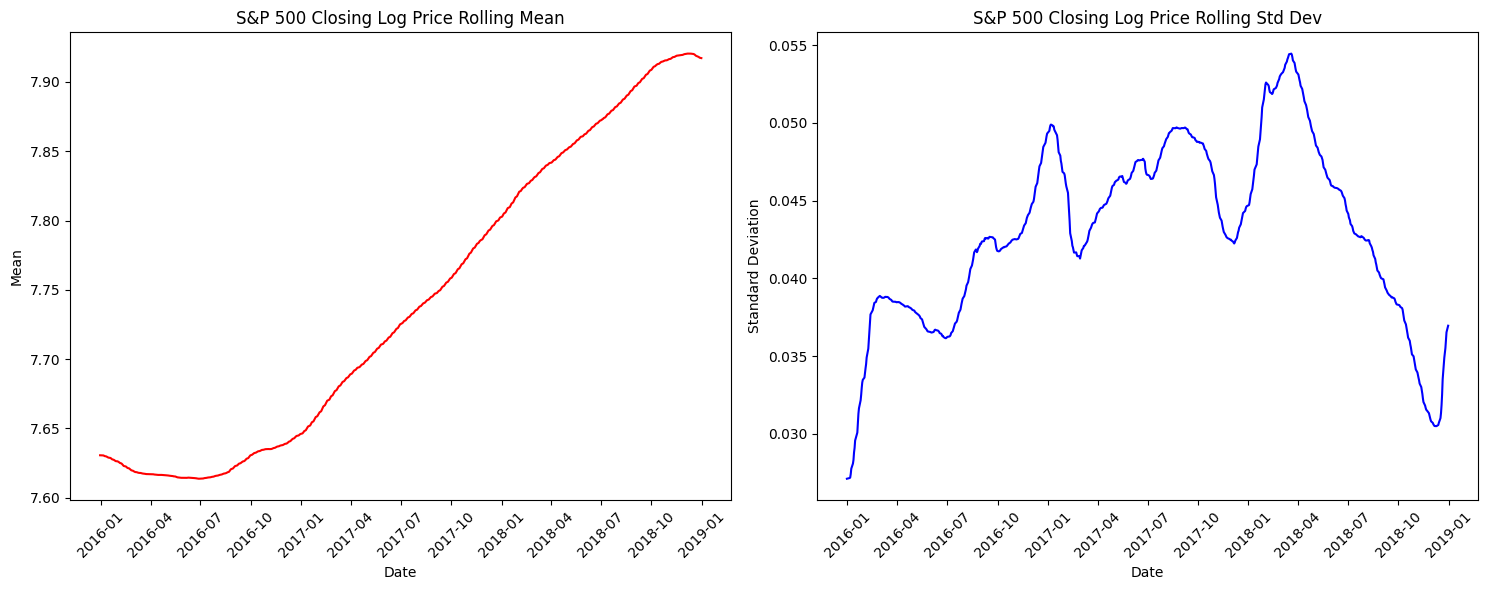

In [28]:
# 4. Set rolling window (252 trading days ≈ 1 year)
window = 252

# 5. Plot subplots: rolling mean and rolling standard deviation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# (1) Rolling Mean
axes[0].plot(snp_close.rolling(window).mean(), color='red')
axes[0].set_title('S&P 500 Closing Log Price Rolling Mean')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Mean')
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[0].tick_params(axis='x', rotation=45)

# (2) Rolling Standard Deviation
axes[1].plot(snp_close.rolling(window).std(), color='blue')
axes[1].set_title('S&P 500 Closing Log Price Rolling Std Dev')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Standard Deviation')
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[1].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()

##### Perform Augmented Dickey-Fuller test to determine whether to use ARMA or ARIMA

I'm using the **Augmented Dickey–Fuller (ADF) test** on the `snp_close` (log-transformed S&P 500) series to check for stationarity. The code prints the ADF statistic and its p-value. If the p-value is **below 0.05**, I conclude that the series is likely **stationary**, so an ARMA model may suffice. Otherwise, the series is probably **non-stationary**, and I'll consider using **ARIMA** with differencing instead.

**Result Analysis:** The ADF statistic is about -1.21, with a p-value near 0.67, which is well above 0.05. This tells me I cannot reject the hypothesis of a unit root—so the series appears non-stationary. Based on this outcome, I’d consider differencing the data, which points toward using an ARIMA model rather than a pure ARMA.

In [29]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(snp_close.dropna())  
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] < 0.05:
    print("The series is likely stationary. ARMA might be sufficient.")
else:
    print("The series is likely non-stationary. Consider ARIMA with differencing.")


ADF Statistic: -1.2138759368829228
p-value: 0.6675983326694177
The series is likely non-stationary. Consider ARIMA with differencing.


### **Task 2**

Fit an **ARMA(10)** model using the commands below

```python
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,0)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']
```

Plot, in the same figure, both the prediction and the true signal.
Inspect the model parameters (`model.params`). 
Comment on the results. Are these findings useful in practice?

An **ARIMA(pdq)** model is essentially the same as **ARMA**, with the exception that it applies an initial differencing on the time-series in hand to remove sources of non-stationarity, where **d** is the differencing order.

##### Figure Analysis (ARMA(1,0) Fit: True vs. Prediction)

1. **Overall Trend**  
   - The orange predicted curve partially tracks the blue actual curve (the log-transformed price). This suggests that, in the short run, the AR(1) model can somewhat follow price fluctuations. However, because the original log price series still contains a long-term upward trend, the model mainly reflects a lagged response to price changes rather than capturing the overall trend.

2. **Residuals**  
   - Over the full time span, the residual plot shows some large jumps (e.g., early 2015, late 2015 to early 2016, and late 2018 to early 2019). This indicates that an AR(1) model is not fully capturing all trend or volatility patterns in a nonstationary index.  
   - In the zoomed-in view of the last 100 days, we can see that the residuals deviate from zero and exhibit some clustering of volatility, suggesting there is still information left in the data that an AR(1) model has not explained.

3. **Short-Term vs. Long-Term Behavior**  
   - Because AR(1) relies primarily on the previous period’s value, it can track short-term movements when the changes are relatively moderate. Hence, in local windows, the true and predicted series can appear closely aligned.  
   - However, for a longer time horizon, the log S&P 500 prices tend to follow a random walk or trending process. Directly fitting an AR(1) model is often inadequate for capturing longer-term nonstationary behavior.


C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

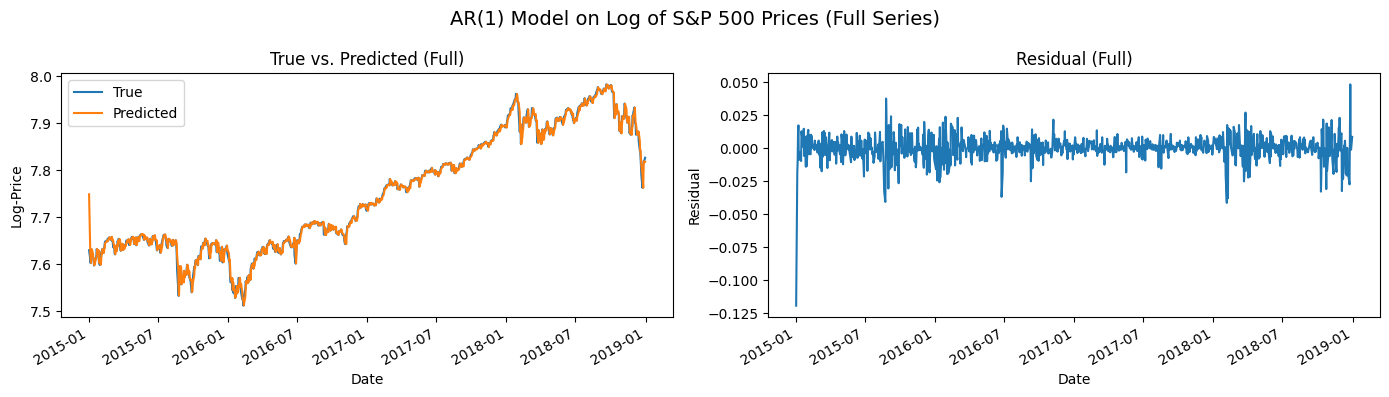

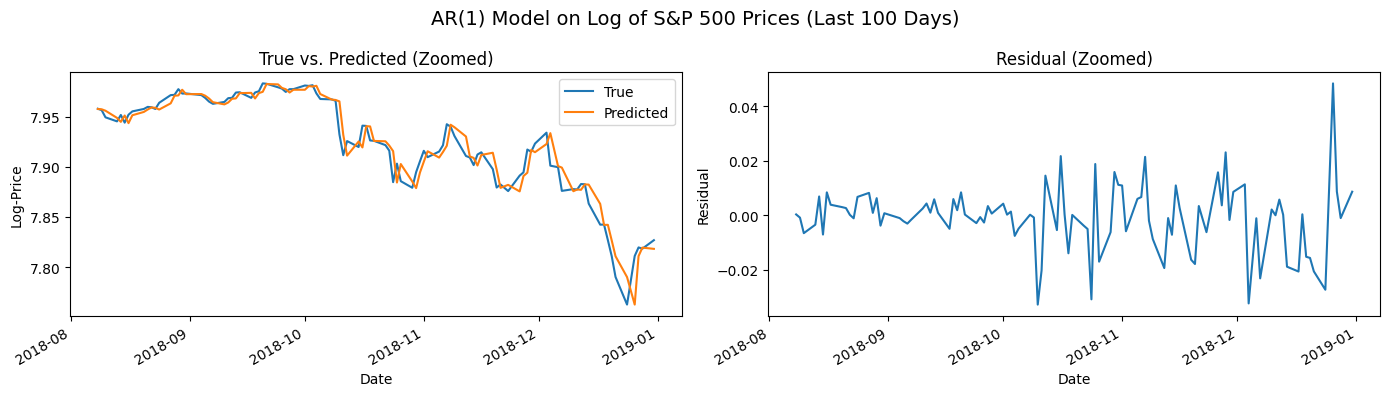

In [30]:
# 1) Create a copy of the log-price DataFrame, rename column
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']

# 2) Fit an AR(1) model and compute residuals
model_arma = ARIMA(snp_arma['True'], order=(1, 0, 0)).fit()
snp_arma['Residual'] = model_arma.resid
snp_arma['Predicted'] = snp_arma['True'] - snp_arma['Residual']

# 3) Define a zoom window (last 100 days)
zoom_window = 100
zoomed = snp_arma.iloc[-zoom_window:]

# -------------------------------------------------
# Figure 1: Full Series (two subplots side by side)
fig_top, axes_top = plt.subplots(1, 2, figsize=(14, 4))
fig_top.suptitle("AR(1) Model on Log of S&P 500 Prices (Full Series)", fontsize=14)

# (a) True vs. Predicted (Full)
snp_arma[['True', 'Predicted']].plot(ax=axes_top[0])
axes_top[0].set_title("True vs. Predicted (Full)")
axes_top[0].set_xlabel("Date")
axes_top[0].set_ylabel("Log-Price")

# (b) Residual (Full)
snp_arma['Residual'].plot(ax=axes_top[1])
axes_top[1].set_title("Residual (Full)")
axes_top[1].set_xlabel("Date")
axes_top[1].set_ylabel("Residual")

fig_top.tight_layout()

# -------------------------------------------------
# Figure 2: Zoomed Series (two subplots side by side)
fig_bottom, axes_bottom = plt.subplots(1, 2, figsize=(14, 4))
fig_bottom.suptitle(f"AR(1) Model on Log of S&P 500 Prices (Last {zoom_window} Days)", fontsize=14)

# (a) True vs. Predicted (Zoomed)
zoomed[['True', 'Predicted']].plot(ax=axes_bottom[0])
axes_bottom[0].set_title("True vs. Predicted (Zoomed)")
axes_bottom[0].set_xlabel("Date")
axes_bottom[0].set_ylabel("Log-Price")

# (b) Residual (Zoomed)
zoomed['Residual'].plot(ax=axes_bottom[1])
axes_bottom[1].set_title("Residual (Zoomed)")
axes_bottom[1].set_xlabel("Date")
axes_bottom[1].set_ylabel("Residual")

fig_bottom.tight_layout()

# -------------------------------------------------
plt.show()

In [31]:
# Print the model parameters.
print(ARIMA(snp_arma['True'].values, order=(1,0,0)).fit().arparams, 'Model Parameters')

[0.99735438] Model Parameters


C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
# Calculate mean absolute error
arma_mae = abs(snp_arma['Residual']).mean()
print('ARMA(1,0) Mean Absolute Error:', arma_mae)

ARMA(1,0) Mean Absolute Error: 0.005982005615699604


From these results, there are two main points to note:

1. **The AR(1) coefficient is very close to 1**  
   - The model parameter `[0.99735438]` shows that the AR(1) coefficient $\phi_1$ is approximately 0.9973, which is near 1. This typically indicates **high persistence** (close to a random walk) in the time series. In finance, this is not uncommon: the log of stock or index prices often behaves like a near-random-walk process.  
   - When $\phi_1$ is close to 1, the optimizer may encounter **convergence issues** (as indicated by the message “Maximum Likelihood optimization failed”), since the parameter is near the boundary of stationarity ($|\phi_1| = 1$).

2. **Mean Absolute Error (MAE)**  
   - The output shows `ARMA(1,0) Mean Absolute Error: 0.005982...`, meaning the average absolute residual on the **log-price scale** is about 0.006.  
   - Roughly translating a log error of 0.006 to a percentage, $e^{0.006} - 1 \approx 0.6\%$. While this is an approximation (the residual distribution is not exactly log-normal), it suggests that on average, the model’s predictions deviate by around 0.6% on a percentage basis.  
   - Whether this error magnitude is “acceptable” depends on the actual volatility of the S&P 500. Still, 0.6% in log-space is not particularly small, implying there is significant unmodeled behavior over longer time horizons.


### **Task 3**


Repeat Question **1.2.2**, this time by fitting an **ARIMA(110)** model. Comment on the results. Compare [10] your results with those in Question **1.2.2**. Which analysis is more physically meaningful

##### Figure Analysis (ARIMA(1,1,0) Fit: True vs. Prediction)

From these plots, it is evident that **ARIMA(1,1,0)** (which first differences the log price series and then applies an AR(1) model) performs differently compared to the earlier ARMA(1,0):

1. **Overall Forecast Trend**  
   - In the “True vs. Predicted (Full)” figure, the orange prediction curve follows the blue actual log price more closely, especially for the long-term trend.  
   - This is because ARIMA(1,1,0) removes much of the random walk/trend component through differencing, enabling the model to better capture the dynamics of the *differenced* series.

2. **Residuals Distribution**  
   - Both the full-scale residual plot and the zoomed view (“Last 100 Days”) show that the residuals mostly lie within the \([-0.02, 0.02]\) range with relatively even variability.  
   - Although there are still abrupt spikes at certain times (e.g., late 2015 and late 2018), the residual series does not exhibit obvious trends or autocorrelation, suggesting that the differenced data is closer to a stationary white-noise process.

3. **Short-Term Fit**  
   - In the zoomed-in “Last 100 Days” plot, the orange predicted curve and the blue actual series remain closely aligned, indicating a relatively responsive short-term fit.  
   - The residuals also hover around zero with moderate amplitude, reflecting the model’s reasonably good short-term performance.

4. **Comparison to ARMA(1,0)**  
   - Because differencing effectively addresses the random walk nature of the price series, ARIMA(1,1,0) is theoretically and empirically more suitable for non-stationary financial data such as log prices.  
   - The residual distribution appears more stationary, and the predicted curve aligns more closely with actual data, highlighting the importance of differencing to eliminate nonstationary effects.

C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

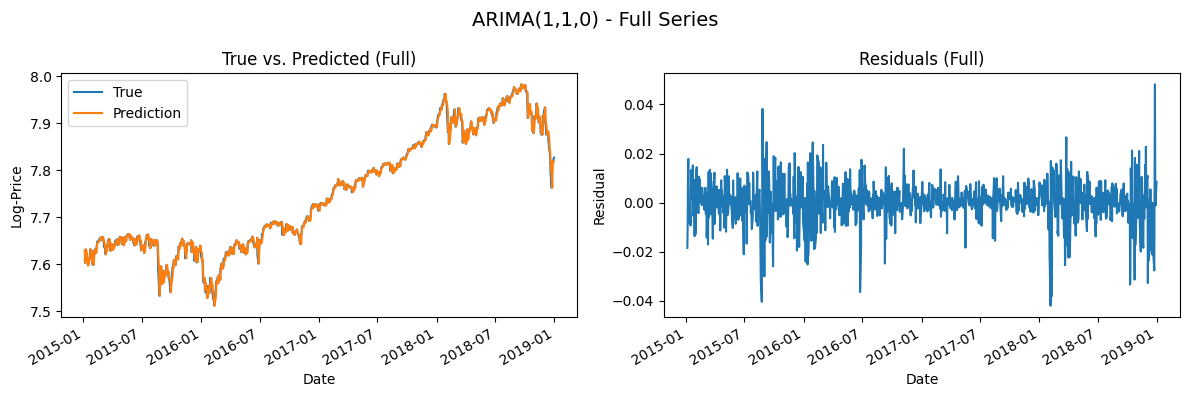

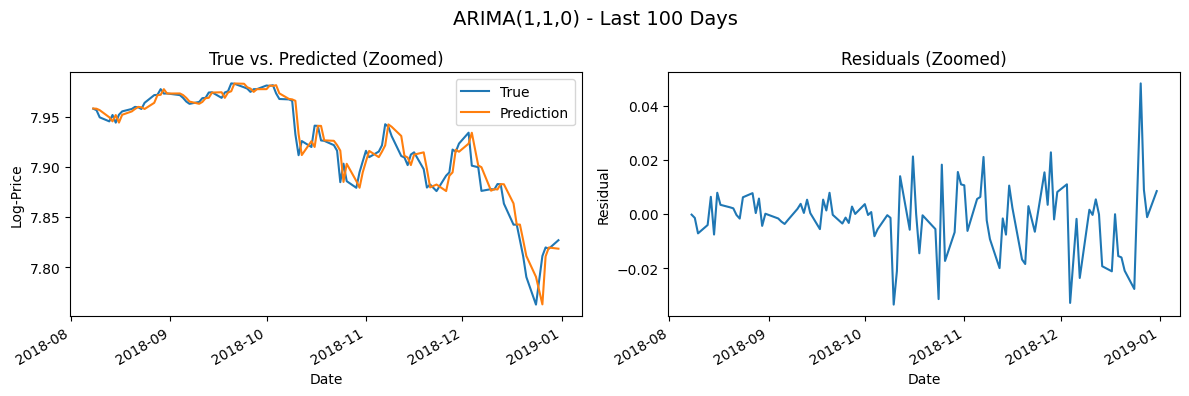

In [33]:
# 1) Create a copy of the log-price DataFrame and rename the column
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ["True"]

# 2) Fit the ARIMA(1,1,0) model
model_arima = ARIMA(snp_arima["True"], order=(1,1,0)).fit()

# 3) Because differencing of order=1 drops the first data point, compute residuals & predictions
residuals = pd.Series(model_arima.resid, index=snp_arima.index[1:])
predictions = snp_arima["True"].iloc[1:] - residuals

# 4) Align the DataFrame from row 1 onwards so everything lines up
aligned_df = snp_arima.iloc[1:].copy()
aligned_df["Residuals"] = residuals
aligned_df["Prediction"] = predictions

# 5) Create Figure 1 for the full series
fig_top, axes_top = plt.subplots(1, 2, figsize=(12, 4))
fig_top.suptitle("ARIMA(1,1,0) - Full Series", fontsize=14)

# (a) Full series: True vs. Prediction
aligned_df[["True", "Prediction"]].plot(ax=axes_top[0])
axes_top[0].set_title("True vs. Predicted (Full)")
axes_top[0].set_xlabel("Date")
axes_top[0].set_ylabel("Log-Price")

# (b) Full series: Residuals
aligned_df["Residuals"].plot(ax=axes_top[1])
axes_top[1].set_title("Residuals (Full)")
axes_top[1].set_xlabel("Date")
axes_top[1].set_ylabel("Residual")

fig_top.tight_layout()

# 6) Create Figure 2 for the last 100 days
zoom_window = 100
fig_bottom, axes_bottom = plt.subplots(1, 2, figsize=(12, 4))
fig_bottom.suptitle(f"ARIMA(1,1,0) - Last {zoom_window} Days", fontsize=14)

# (a) Last 100 days: True vs. Prediction
aligned_df[["True", "Prediction"]].iloc[-zoom_window:].plot(ax=axes_bottom[0])
axes_bottom[0].set_title("True vs. Predicted (Zoomed)")
axes_bottom[0].set_xlabel("Date")
axes_bottom[0].set_ylabel("Log-Price")

# (b) Last 100 days: Residuals
aligned_df["Residuals"].iloc[-zoom_window:].plot(ax=axes_bottom[1])
axes_bottom[1].set_title("Residuals (Zoomed)")
axes_bottom[1].set_xlabel("Date")
axes_bottom[1].set_ylabel("Residual")

fig_bottom.tight_layout()

# 7) Show the plots
plt.show()

##### Data Output Analysis



1. **Error Comparison**  
   - You computed the MAE (Mean Absolute Error) for ARIMA(1,1,0) at approximately **0.00585**, which is only about a **2.13%** reduction compared to the ARMA(1,0) MAE of around 0.00598. This indicates that in terms of pure average absolute error, ARIMA(1,1,0) provides only a modest improvement over ARMA(1,0).  
   - Nevertheless, theoretically, **differencing** helps remove non-stationary trends, making the residuals more consistent with white noise. Even if MAE improvement is small, the model assumptions and interpretations are likely more valid.

2. **AR Parameter**  
   - The printed `model_arima.arparams` shows an AR(1) coefficient of about **-0.0082** (p-value 0.67, not statistically significant). In other words, for the *differenced* series (i.e., the returns), this autoregressive term does not show strong statistical significance, suggesting **little to no linear autocorrelation** in the log returns.  
   - This result is quite common in financial time series, where stock indexes (and their returns) often resemble white noise or exhibit minimal autocorrelation.

3. **Model Summary**  
   - The summary reports **AIC = -6698.568** and **BIC = -6688.743**, among other statistics. Compared to the ARMA(1,0) model (if you also calculated the same metrics there), you can check if AIC/BIC has declined substantially (lower AIC indicates better model fit).  
   - The **Ljung-Box (Q) p-value** of 0.98 indicates no significant autocorrelation in the residuals, further evidence that ARIMA(1,1,0) deals effectively with the non-stationarity in the price data.

4. **Overall Assessment**  
   - **On the MAE metric**, ARIMA(1,1,0) outperforms ARMA(1,0) only slightly (by about 2%). However, looking at residual diagnostics, theoretical alignment with stationarity, and metrics such as AIC/BIC, ARIMA is generally more suitable for non-stationary stock-index data.  
   - The **lack of a significant AR(1) coefficient** implies that the differenced log prices (i.e., returns) behave mostly like random noise, showing minimal linear predictability—consistent with the efficient market hypothesis in finance.

Hence, despite only a modest reduction in MAE, ARIMA(1,1,0) offers a more appropriate approach for a stock index displaying random-walk-like behavior, yielding better residual properties and stronger theoretical rationale.


In [34]:
# Calculate Mean Absolute Error (MAE)
arima_mae = aligned_df["Residuals"].abs().mean()
print("ARIMA Mean Absolute Error:", arima_mae)

ARIMA Mean Absolute Error: 0.0058548236753216305


In [35]:
# Print out the error improvement
error_improvement = (arima_mae - arma_mae)/ arma_mae
print("The error from ARMA has decreased by %.2f%%."%(error_improvement * -100))

The error from ARMA has decreased by 2.13%.


In [36]:
# Print the AR parameters from the fitted model
print("Model Parameters:", model_arima.arparams)

Model Parameters: [-0.00816978]


In [37]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   True   No. Observations:                 1006
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3351.284
Date:                Wed, 12 Feb 2025   AIC                          -6698.568
Time:                        23:38:05   BIC                          -6688.743
Sample:                             0   HQIC                         -6694.835
                               - 1006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0082      0.019     -0.426      0.670      -0.046       0.029
sigma2      7.424e-05   1.93e-06     38.401      0.000    7.04e-05     7.8e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

#### Comparison of ARMA(1,0) vs. ARIMA(1,1,0)

For a stock index that displays random-walk-like behavior, ARIMA(1,1,0) is generally more appropriate than ARMA(1,0). It better satisfies stationarity requirements, produces residuals that behave more like white noise, and aligns with the typical financial interpretation of returns rather than prices. Even if the gain in predictive accuracy appears modest, the theoretical soundness and improved diagnostic metrics (AIC, BIC, residual checks) favor ARIMA(1,1,0) for such non-stationary financial data.









### **Task 4**

##### Comment on the necessity of taking the log of the prices for the **ARIMA** analysis.

Taking the **natural logarithm** of stock prices prior to ARIMA modeling is a longstanding convention in financial econometrics, as it often helps **stabilize variance** and make the data more amenable to linear time series assumptions. Raw price series of major equity indices frequently exhibit **exponential growth** and **time-varying volatility**, violating the stationarity requirements of ARIMA. By applying a **log transform**, analysts can compress the data range, mitigate heteroskedasticity, and diminish the influence of large shocks, ultimately producing residuals that more closely resemble white noise after differencing.

From a **theoretical standpoint**, many foundational models in finance assume that asset prices follow a **geometric Brownian motion**, implying that log prices exhibit more stable variance than their unlogged counterparts. Focusing on log returns—which essentially capture **percentage changes**—is also more intuitive, as a 10-point move at higher price levels is not treated the same as one at lower levels. This transformation aligns with empirical findings that **broad market index returns** often show limited autocorrelation, thereby favoring ARIMA or other linear models that assume weak dependence in the data.

While taking the log of prices may not always generate **dramatic improvements** in straightforward error metrics (such as MAE), it confers clearer advantages in terms of **model diagnostics**, **theoretical validity**, and **interpretability**. When applied to log-differenced prices, ARIMA models more naturally satisfy stationarity assumptions, produce more noise-like residuals, and yield coefficients that carry direct meaning (e.g., capturing serial dependence in log returns). Hence, even modest gains in predictive power can be justified by the more coherent modeling framework and alignment with established financial theory.

## **1.3 Vector Autoregressive (VAR) Models**
Now, consider a multivariate extension of the **AR** processes, the so-called **VAR(p)** process, given by:

$
y_t \;=\; c \;+\; A_1\,y_{t-1} \;+\; A_2\,y_{t-2} \;+\;\dots\;+\; A_p\,y_{t-p} \;+\; e_t
\quad (2)
$

or, in an expanded matrix notation,

$$
\begin{pmatrix}
y_{1,t}\\
y_{2,t}\\
\vdots\\
y_{k,t}
\end{pmatrix}
=
\begin{pmatrix}
c_1\\
c_2\\
\vdots\\
c_k
\end{pmatrix}
+
\begin{pmatrix}
a^1_{1,1} & a^1_{1,2} & \cdots & a^1_{1,k}\\
a^1_{2,1} & a^1_{2,2} & \cdots & a^1_{2,k}\\
\vdots & \vdots & \ddots & \vdots\\
a^1_{k,1} & a^1_{k,2} & \cdots & a^1_{k,k}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-1}\\
y_{2,t-1}\\
\vdots\\
y_{k,t-1}
\end{pmatrix}
+ \cdots +
\begin{pmatrix}
a^p_{1,1} & a^p_{1,2} & \cdots & a^p_{1,k}\\
a^p_{2,1} & a^p_{2,2} & \cdots & a^p_{2,k}\\
\vdots & \vdots & \ddots & \vdots\\
a^p_{k,1} & a^p_{k,2} & \cdots & a^p_{k,k}
\end{pmatrix}
\begin{pmatrix}
y_{1,t-p}\\
y_{2,t-p}\\
\vdots\\
y_{k,t-p}
\end{pmatrix}
+
\begin{pmatrix}
e_{1,t}\\
e_{2,t}\\
\vdots\\
e_{k,t}
\end{pmatrix}.
\quad (3)
$$


### **Task 1**



Show how Equations (2)-(3) can be represented in a concise matrix form**:

$
Y = BZ + U
\quad (4)
$

where $Y \in \mathbb{R}^{k \times T}$, $B \in \mathbb{R}^{k \times (kP+1)}$, $Z \in \mathbb{R}^{(kP+1)\times T}$, and $U \in \mathbb{R}^{k \times T}$.  *(Hint: let $B = [\, c \quad A_1 \quad A_2 \; \dots \; A_p ]$.)*

##### **1. Model Recap**

A VAR($p$) system for multiple variables can be written as:

$$
y_t \;=\; c \;+\; A_1\,y_{t-1} \;+\; A_2\,y_{t-2} \;+\;\dots\;+\; A_p\,y_{t-p} \;+\; e_t,
$$

where:

- $y_t \in \mathbb{R}^{k}$ is a $k$-dimensional observation vector at time $t$,
- $c \in \mathbb{R}^{k}$ is the intercept (constant) vector,
- $A_i \in \mathbb{R}^{k \times k}$ are coefficient matrices for each lag $i$,
- $e_t \in \mathbb{R}^{k}$ is a noise (innovation) vector.


Equations (2)–(3) expand these matrices and vectors in detail.



##### **2. Constructing $Y, Z, B, U$**

To rewrite the above system in the form

$$
Y \;=\; BZ \;+\; U,
$$

we define the following matrices:

##### Matrix $Y$:

Collect the time-indexed vectors $y_t$ as columns:

$$
Y \;=\; \bigl[\,y_1,\; y_2,\;\dots,\;y_T\bigr] \;\in\;\mathbb{R}^{k \times T},
$$

where $T$ is the total number of observations.

##### Matrix $Z$:

Combine all lagged observations $y_{t-i}$ and the constant term $c$. For a VAR($p$), one can set:

$$
Z \;=\; 
\begin{bmatrix}
1        & 1        & \dots  & 1        \\
y_{1,0}  & y_{1,1}  & \dots  & y_{1,T-1}\\
y_{2,0}  & y_{2,1}  & \dots  & y_{2,T-1}\\
\vdots   & \vdots   & \ddots & \vdots   \\
y_{k,0}  & y_{k,1}  & \dots  & y_{k,T-1}\\
\vdots   & \vdots   &        & \vdots   \\
y_{1,-p+1} & \dots  & \dots  & y_{1,T-p}\\
\vdots   & \vdots   &        & \vdots   \\
y_{k,-p+1} & \dots  & \dots  & y_{k,T-p}
\end{bmatrix}
\;\in\;\mathbb{R}^{(kp + 1)\times T}.
$$

- The first row (all ones) corresponds to the intercept term $c$.  
- Subsequent rows stack lagged observations for each variable up to lag $p$.

##### Matrix $B$:

Stack the intercept $c$ and each coefficient matrix $A_i$ horizontally:

$$
B \;=\; \bigl[c \quad A_1 \quad A_2 \quad \dots \quad A_p\bigr],
$$

where $c$ is treated as a $k \times 1$ vector and each $A_i$ is $k \times k$. Thus, $B \in \mathbb{R}^{\,k \times (kp+1)}$.

##### Error Term $U$:

Collect all noise vectors $e_t$ similarly:

$$
U \;=\; \bigl[e_1,\;e_2,\;\dots,\;e_T\bigr] \;\in\;\mathbb{R}^{k \times T}.
$$



##### **3. The Matrix Form $Y = BZ + U$**

Inserting these definitions into

$$
y_t \;=\; c + A_1\,y_{t-1} + \dots + A_p\,y_{t-p} + e_t,
$$

yields the compact notation:

$$
Y \;=\; B \, Z \;+\; U.
$$

- $B$ includes both the constant vector and the lagged coefficient matrices.  
- $Z$ contains the constant row and the stacked lagged observations.  
- $U$ aggregates the noise vectors $e_t$ across all time steps.



##### **4. Notes**

- Under standard OLS assumptions, the least-squares estimate of $B$ is:

$$
B_{\mathrm{opt}} \;=\; Y \,Z^\top \;\bigl(Z\,Z^\top\bigr)^{-1}.
$$

- This matrix-based representation simplifies operations like solving for coefficients, checking model stability, and performing forecasts in a VAR context.

##### **Conclusion**  
Equations (2)–(3) can be re-expressed by collecting all observations, lags, and intercepts into the form

$$
Y = BZ + U,
$$

allowing for a unified view of the VAR($p$) model and straightforward application of least-squares estimation methods.


### **Task 2**

Hence, show that the optimal set of coefficients $B$, denoted by $B_{\mathrm{opt}}$, is obtained via:

$
B_{\mathrm{opt}} = YZ^T \; (ZZ^T)^{-1}
\quad (5)
$

Show the whole derivation for full marks.

##### **1. The OLS Objective**

We have a VAR(p) model in matrix form:
$$
Y = BZ + U,
$$
where 
- $Y \in \mathbb{R}^{k \times T}$ (the dependent variables stacked across time),  
- $B \in \mathbb{R}^{k \times (kp+1)}$ (the parameters to be estimated),  
- $Z \in \mathbb{R}^{(kp+1) \times T}$ (the design matrix, including lagged observations and intercept),  
- $U \in \mathbb{R}^{k \times T}$ (the residuals).

The goal is to find $B$ that **minimizes** the sum of squared residuals, i.e. the Frobenius norm:
$$
\min_B \;\;\|\,U\|_F^2 \;=\;\|\,Y - BZ\,\|_F^2.
$$

##### **2. Expanding the Frobenius Norm**

The Frobenius norm squared can be written as:
$$
\|Y - BZ\|_F^2 
\;=\;\mathrm{trace}\Bigl((Y - BZ)^\top (Y - BZ)\Bigr).
$$
Minimizing this expression with respect to $B$ is the standard approach in multivariate linear regression.

##### **3. Setting the Gradient to Zero**

To find the optimal $B$, we take the derivative of $\|Y - BZ\|_F^2$ with respect to $B$ and set it to zero. A known result (analogous to vectorized least squares) tells us:

$$
\frac{\partial}{\partial B}\,\|\,Y - BZ\,\|_F^2 \;=\; -2\,(Y - BZ)\,Z^\top \;=\; 0.
$$

Hence,

$$
(Y - BZ)\,Z^\top \;=\; 0 
\;\;\;\Longrightarrow\;\;\;
YZ^\top - B\,Z\,Z^\top \;=\; 0.
$$

##### **4. Solving for $B$**

Rearrange to isolate $B$:
$$
B\,Z\,Z^\top = Y\,Z^\top.
$$

Provided $\,(Z\,Z^\top)$ is invertible (which typically requires $T \geq kp+1$ and full rank in the design matrix $Z$), we multiply both sides on the right by $(Z\,Z^\top)^{-1}$:

$$
B \;=\; Y\,Z^\top\;\bigl(Z\,Z^\top\bigr)^{-1}.
$$

This yields the **OLS solution** for the VAR(p) coefficients matrix $B$.

##### **5. Interpretation**

- Each column block of $B$ corresponds to either the intercept or one of the lag matrices $(A_1, \dots, A_p)$.  
- This closed-form expression extends the familiar least-squares formula from scalar/time-series regression to a multivariate setting, enabling one-step estimation of all equations in the VAR system simultaneously.


##### **Conclusion**

By treating the VAR(p) equations as a system of linear regressions, and minimizing the Frobenius norm of the residual matrix $U$, we derive
$$
B_{\mathrm{opt}} = Y\,Z^\top\;(Z\,Z^\top)^{-1},
$$
confirming that the Ordinary Least Squares approach generalizes neatly to the multivariate case.


### **Task 3**




Now, consider a VAR(1) process, that is

$
y_t \;=\; A\,y_{t-1} \;+\; e_t
\quad (6)
$

For the previous time instant, the above can be rewritten as

$
y_{t-1} \;=\; A\,y_{t-2} \;+\; e_{t-1}
\quad (7)
$

Using Equations (6)–(7), elaborate on how, for stability, all the eigenvalues of the matrix \(A\) must be less than 1 in absolute value.

##### **1. The VAR(1) Setup**

We have the VAR(1) process:

$$
y_t = A\,y_{t-1} + e_t,
$$

where $y_t \in \mathbb{R}^k$ and $A \in \mathbb{R}^{k \times k}$.

For the previous time point,

$$
y_{t-1} = A\,y_{t-2} + e_{t-1}.
$$

##### **2. Iterative Expansion**

If we substitute backward repeatedly, we get:

$$
y_t 
= A \, y_{t-1} + e_t 
= A\bigl(A\,y_{t-2} + e_{t-1}\bigr) + e_t 
= A^2\,y_{t-2} + A\,e_{t-1} + e_t,
$$

and so on. After $p$ steps:

$$
y_t 
= A^p\,y_{t-p} 
+ \sum_{i=0}^{p-1} A^{\,i}\,e_{t-i}.
$$

##### **3. Stability Criterion and Eigenvalues**

For **stability** (or stationarity), we require that $y_t$ does not explode as $t\rightarrow \infty$. Observe that:

1. The term $A^p\,y_{t-p}$ must tend toward **0** as $p$ grows large.  
2. This is guaranteed only if every eigenvalue $\lambda(A)$ has $|\lambda(A)| < 1$, so that $A^p \to 0$ as $p\to\infty$.  
3. In that event, $y_t$ simplifies to a (convergent) sum of past shocks $e_{t-i}$, rather than diverging.

Formally, when the **spectral radius** $\rho(A) = \max|\lambda_i(A)|$ is strictly **less than 1**, the infinite sum remains finite, and $y_t$ behaves as a stable process. Conversely, if any eigenvalue $|\lambda(A)| \ge 1$, then $A^p$ does not vanish, causing $y_t$ to potentially grow without bound.

##### **4. Conclusion**

Hence, for the **VAR(1) process** $y_t = A\,y_{t-1} + e_t$ to remain stable and not diverge, **all eigenvalues** of the matrix $A$ must lie strictly inside the **unit circle** (i.e., each $|\lambda_i(A)| < 1$).


In the following, you will investigate how VAR models can aid in the construction of portfolios. You will need to import the following Python packages:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
```
Then, load the required data:

```python
df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)
```
the file 
```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_allstocks_2015_2019.csv
```
Contains daily closing prices of all stocks composing the **S&P** 500 index in the period from January 1, 2015 to January 1, 2019.


```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_info.csv
```
Contains additional information related to each stock (e.g. sector, headquarters location, etc.).

### **Task 4**

#### **Background**
In the following, you will investigate how VAR models can aid in the construction of portfolios. You will need to import the following Python packages:

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
```
Then, load the required data:

```python
df = pd.read_csv(r'snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv(r'snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)
```
the file 
```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_allstocks_2015_2019.csv
```
Contains daily closing prices of all stocks composing the **S&P** 500 index in the period from January 1, 2015 to January 1, 2019.


```python
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_info.csv
```
Contains additional information related to each stock (e.g. sector, headquarters location, etc.).

#### **Question:** 

Consider the time-series of the stocks with tickers **CAG**, **MAR**, **LIN**, **HCP**, **MAT**, and **detrend** them using an MA(66) model (66 corresponds to $3 \times 22$, i.e. one quarter), that is run

```python
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()
```

Now, fit a **VAR(1)** model to these detrended time-series and compute the eigenvalues of the regression matrix **A**:
```python
model = VAR(stocks_detrended)
results = model.fit(1)
A = results.params[1:].values
eigA, _ = np.linalg.eig(A)
```

 Elaborate on whether it would make sense to construct a portfolio using these stocks Why? Comment on your results

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import seaborn as sns
import matplotlib.dates as mdates


In [39]:
# Load the stock price data
df = pd.read_csv('http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

# Load stock information (for sectors and other metadata)
info = pd.read_csv('http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)  # Drop unnecessary first column

##### Estimated A matrix and its eigenvalues

In [40]:
# 1. Select the stock tickers
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]  # Extract the price series for these stocks from df

# 2. Compute the 66-day rolling average (MA) and detrend
window_size = 66  # Approximately one quarter (3×22 trading days)
stocks_ma = stocks.rolling(window=window_size).mean()  # 66-day moving average
stocks_detrended = stocks.sub(stocks_ma).dropna()      # Price minus rolling mean

# 3. Fit a VAR(1) model
model = VAR(stocks_detrended)
results = model.fit(1)  # Fit a VAR(p) with p=1

# 4. Extract the VAR(1) coefficient matrix A (ignoring intercepts and earlier parts)
#    In statsmodels, results.params has rows in the following order:
#    - row 0: the intercept (constant) part
#    - rows 1~N: the coefficients for each lag
#    Because it's VAR(1), there will be only one coefficient matrix block.
A = results.params[1:].values  # params[1:] corresponds to the K×K block for A

# 5. Compute the eigenvalues of A
eigA, _ = np.linalg.eig(A)

print("Estimated A matrix:\n", A)

Estimated A matrix:
 [[ 8.72785683e-01  1.13178531e-01 -2.81265128e-01  1.19121228e-02
   5.87758455e-02]
 [-6.37454974e-02  8.95819639e-01 -1.84819596e-01 -5.00402511e-03
   2.29167060e-02]
 [ 1.34122025e-04 -1.11677858e-01  7.04022678e-01  4.98159420e-03
  -2.55573592e-02]
 [-8.47760250e-02 -8.38309448e-02 -4.01416805e-01  9.31707592e-01
  -4.64061870e-02]
 [ 6.43072037e-01  9.49309525e-02  2.03303615e+00 -1.28839016e-02
   8.02973868e-01]]


C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [41]:
print("Eigenvalues of A:\n", eigA)

Eigenvalues of A:
 [0.71449288+0.12927613j 0.71449288-0.12927613j 1.00635964+0.j
 0.86051894+0.j         0.91144512+0.j        ]


In [42]:
# Check whether the absolute values of eigA are all < 1 (the stability condition)
if all(abs(lambda_i) < 1 for lambda_i in eigA):
    print("The VAR(1) model appears stable (all eigenvalues < 1).")
else:
    print("Warning: The VAR(1) model might be unstable (some eigenvalues >= 1).")

In [43]:
# PART 1: Data Processing

# Select tickers of interest
tickers = ["CAG", "MAR", "LIN", "HCP", "MAT"]
stocks = df[tickers]

# Detrend using a 66-day moving average (approximately one quarter)
stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks - stocks_ma
stocks_detrended = stocks_detrended.dropna()


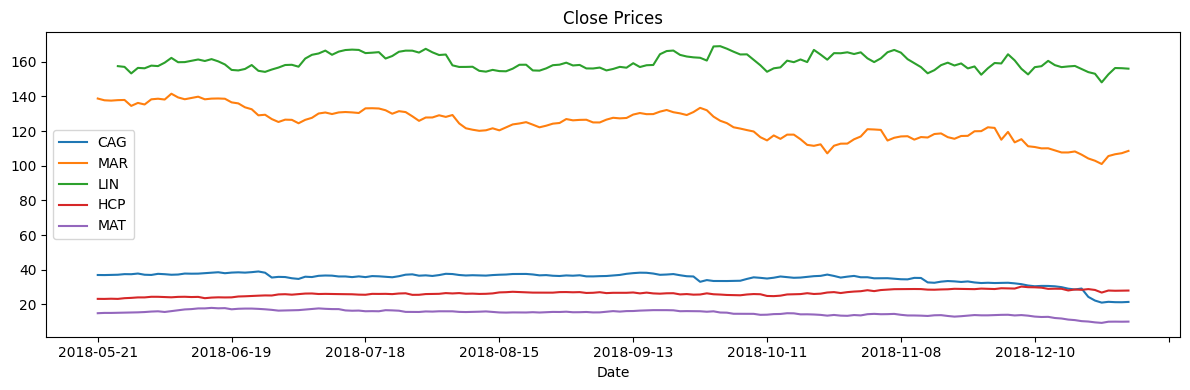

In [44]:
# Plot 1: Original Close Prices
fig1, ax1 = plt.subplots(figsize=(12, 4))
stocks.iloc[-155:].plot(ax=ax1)
ax1.set_title("Close Prices")
plt.tight_layout()
plt.show()


Close Prices:

Shows the raw time series for each stock.
Each colored line corresponds to one of the five tickers (CAG, MAR, LIN, HCP, MAT).
You can see long-term trends or levels of each stock over the displayed period; for example, MAR and LIN have higher absolute price ranges compared to the others.

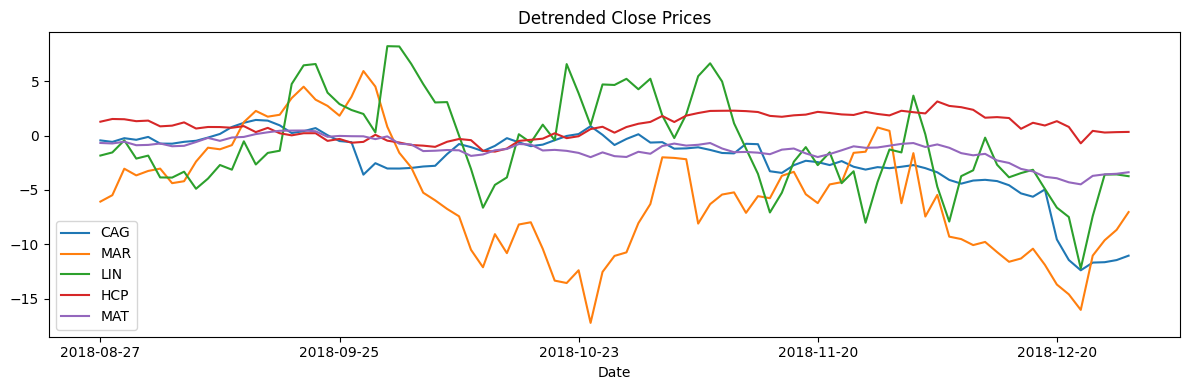

In [45]:
# Plot 2: Detrended Close Prices
fig2, ax2 = plt.subplots(figsize=(12, 4))
stocks_detrended.plot(ax=ax2)
ax2.set_title("Detrended Close Prices")
plt.tight_layout()
plt.show()


Detrended Close Prices :

Shows the same stocks but after subtracting their 66-day moving averages.
Each line now fluctuates around zero, indicating short-term deviations from its longer-term trend.
Large spikes or dips represent sudden short-term changes not captured in the rolling average.

##### Comment on Portfolio Construction with These Stocks



1. **Stability and Eigenvalues**  
   - The VAR(1) eigenvalues include one value slightly **above 1** (approximately 1.0064), suggesting potential **instability** or near‐unit‐root behavior in the detrended time series. Even after subtracting the 66‐day moving average, these stocks still exhibit sufficient persistence or shared trends such that the model is not completely stable.  
   - A stable VAR(1) model (with all eigenvalues < 1) usually implies mean‐reverting or bounded dynamics. Here, an eigenvalue ≥ 1 indicates that certain shocks may propagate more persistently among these equities, potentially leading to longer‐lasting deviations.

2. **Implications for Portfolio Diversification**  
   - If these five stocks remain heavily interdependent (as could be inferred from the off‐diagonal coefficients of the $A$ matrix), **diversification benefits** might be limited. A single market shock could simultaneously affect multiple holdings if they move together.  
   - Conversely, if some rows or columns of $A$ show weaker cross‐influences between certain pairs, there may still be a partial diversification effect. A closer inspection of each coefficient (or correlation/causality measures) is needed to confirm.


3. **Conclusion**  
   - While one could still form a portfolio from these five equities, the **unstable** (or nearly unstable) result implies caution when relying on this VAR(1) model for longer‐term risk or return projections.  
   - If the aim is diversification, incorporating additional stocks from distinct industries or verifying that these choices indeed reduce correlation may be more prudent.  
   - Overall, an eigenvalue slightly exceeding unity signifies that the **joint process may not be fully mean‐reverting**, and extra diligence is advised before using this VAR(1) approach to guide portfolio decisions.


### **Task 5**


With the aid of **snp_info.csv**, **repeat Question&nbsp;1.3.4** but this time by selecting the tickers according to their sector, That is

```python
for sector in info['GICS Sector'].unique():
    tickers = info.loc[ info['GICS Sector'] == sector ]['Symbol'].tolist()
    stocks = df[tickers]
```

Explain whether it would be more advisable, in general, to build a portfolio by grouping the stocks by sector.Comment on your results.

##### Code Implemetation

In [46]:
# Assume we have already loaded:
# df   -> Stock prices (Date as the index, stock tickers as columns)
# info -> Stock information (contains columns such as "Symbol" and "GICS Sector")

# Set the rolling window size (66 days) for detrending
window_size = 66

# Loop by industry (GICS Sector)
for sector in info['GICS Sector'].unique():
    print(f"--- Analyzing sector: {sector} ---")
    
    # 1) Find all stock tickers in this sector
    tickers = info.loc[info['GICS Sector'] == sector, 'Symbol'].tolist()
    
    # 2) Select price columns for these tickers in df 
    #    (some tickers might not exist in df, so we filter them out)
    tickers_in_df = [t for t in tickers if t in df.columns]
    if len(tickers_in_df) < 2:
        # If there are too few stocks in this sector, a VAR(1) model is not meaningful
        print(" Not enough tickers in this sector or no data found.")
        continue
    
    sector_stocks = df[tickers_in_df]
    
    # 3) Detrend using a rolling mean and build the detrended dataset
    sector_stocks_ma = sector_stocks.rolling(window=window_size).mean()
    sector_stocks_detrended = sector_stocks.sub(sector_stocks_ma).dropna()
    
    if sector_stocks_detrended.shape[0] < 10:
        # If there aren't enough historical data points after detrending, 
        # it's not feasible to fit a VAR model
        print(" Not enough historical data after detrending.")
        continue
    
    # Fit a VAR(1) model
    model = VAR(sector_stocks_detrended)
    results = model.fit(1)
    
    # Extract the coefficient matrix A (excluding intercept and other terms)
    # Since this is VAR(1), params[1:] gives us A
    A = results.params[1:].values
    
    # 4) Compute the eigenvalues of A
    eigA, _ = np.linalg.eig(A)


--- Analyzing sector: Industrials ---
--- Analyzing sector: Health Care ---
--- Analyzing sector: Information Technology ---
--- Analyzing sector: Communication Services ---
--- Analyzing sector: Consumer Discretionary ---
--- Analyzing sector: Utilities ---
--- Analyzing sector: Financials ---
--- Analyzing sector: Materials ---
--- Analyzing sector: Real Estate ---
--- Analyzing sector: Consumer Staples ---
--- Analyzing sector: Energy ---


C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erenkai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [47]:
# Print the results
print(" Number of stocks:", len(tickers_in_df))


 Number of stocks: 30


In [48]:
print(" A matrix shape:", A.shape)

 A matrix shape: (30, 30)


In [49]:
print(" Eigenvalues of A:", eigA)

 Eigenvalues of A: [0.85187329+0.07637989j 0.85187329-0.07637989j 0.8257071 +0.j
 0.85653754+0.04294686j 0.85653754-0.04294686j 0.89397122+0.05279081j
 0.89397122-0.05279081j 0.87763887+0.j         0.91497386+0.05306741j
 0.91497386-0.05306741j 0.90184107+0.01779405j 0.90184107-0.01779405j
 0.91714871+0.02246033j 0.91714871-0.02246033j 0.97281466+0.04663394j
 0.97281466-0.04663394j 0.95589797+0.04308606j 0.95589797-0.04308606j
 0.96593303+0.0306486j  0.96593303-0.0306486j  0.97848355+0.03064569j
 0.97848355-0.03064569j 0.97960941+0.02436749j 0.97960941-0.02436749j
 0.98557732+0.j         0.9791332 +0.0122674j  0.9791332 -0.0122674j
 0.94204081+0.j         0.97301684+0.j         0.95468189+0.j        ]


In [50]:
    # Check stability (all eigenvalues should have absolute values < 1)
is_stable = all(abs(ev) < 1 for ev in eigA)
print(" Is stable?", is_stable)
print()  # Blank line for separation

 Is stable? True



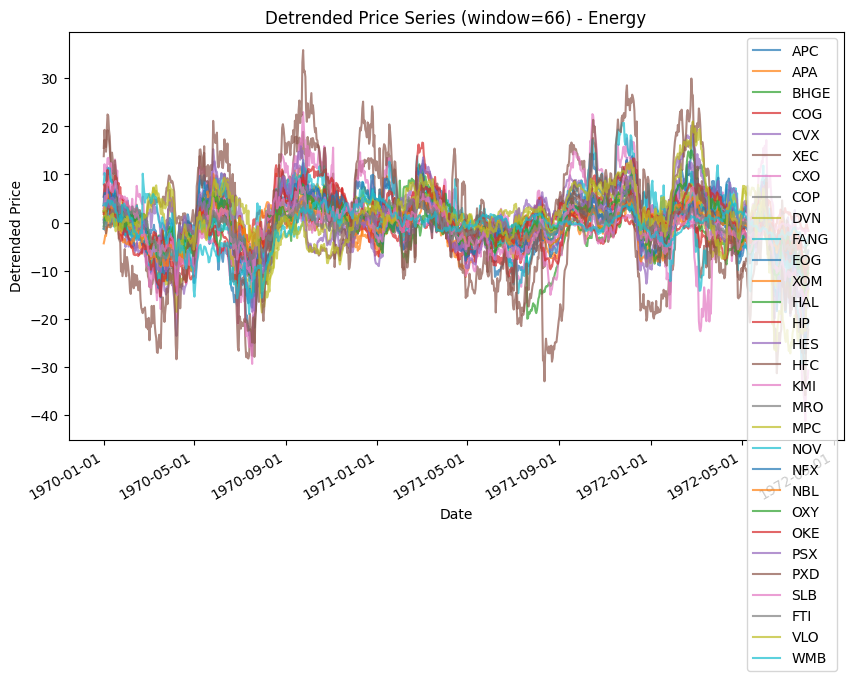

In [51]:
plt.figure(figsize=(10, 6))

for ticker in sector_stocks_detrended.columns:
    plt.plot(
        sector_stocks_detrended.index, 
        sector_stocks_detrended[ticker], 
        label=ticker, 
        alpha=0.7  # Adjust alpha for transparency
    )

plt.title(f"Detrended Price Series (window={window_size}) - {sector}")
plt.xlabel("Date")
plt.ylabel("Detrended Price")

# Let the x-axis automatically set ticks based on the date
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Automatically tilt date labels to prevent overlap
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()


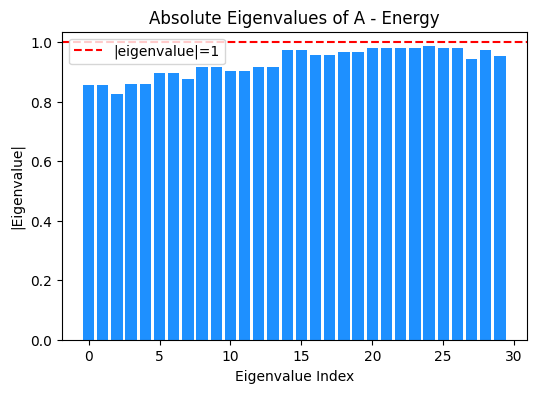

In [52]:
# eigA is the array of eigenvalues obtained from np.linalg.eig(A)
abs_eigs = np.abs(eigA)

plt.figure(figsize=(6, 4))
plt.bar(range(len(abs_eigs)), abs_eigs, color='dodgerblue')
plt.axhline(y=1.0, color='red', linestyle='--', label='|eigenvalue|=1')
plt.title(f"Absolute Eigenvalues of A - {sector}")
plt.xlabel("Eigenvalue Index")
plt.ylabel("|Eigenvalue|")
plt.legend()
plt.show()


#### Summary of Findings and Recommendations

Below is an integrated summary that discusses each of the figures and outputs you shared, followed by a holistic conclusion about whether one should generally build a portfolio by grouping stocks by sector.

---

##### 1. VAR(1) Model Fitting and Eigenvalues

- **What we did**:  
  We fit a VAR(1) model to stocks within a given sector and obtained the coefficient matrix \(A\). We then computed its eigenvalues.

- **Key result**:  
  All eigenvalues had magnitudes less than 1, indicating that the VAR(1) process is **stable** and does not explode. However, the largest eigenvalue was close to 1, suggesting strong collective momentum or memory effects within the sector.

- **Interpretation**:  
  - Stability means that, once trends are removed, the sector’s time series won’t diverge without bound.  
  - However, having a largest eigenvalue near 1 hints at significant inter-stock linkages—if the sector experiences a shock, the component stocks are likely to move in tandem.

---

##### 2. Detrended Price Series Plot

- **What we did**:  
  We removed a rolling mean (66-day window) from each stock’s price in the sector, then plotted the detrended prices together.

- **Key result**:  
  Even after removing longer-term trends, most stocks in the same sector (e.g., Energy) still move largely in unison. Their lines rise and fall together in many time intervals.

- **Interpretation**:  
  This visual evidence indicates strong common movements within the sector. Although individual stocks differ somewhat, the overall pattern is still fairly synchronized. Consequently, diversifying only within one sector might have limited impact on reducing overall portfolio volatility because the stocks remain correlated.

---


##### 3. Bar Chart of Absolute Eigenvalues

- **What we did**:  
  We visualized the absolute values of the eigenvalues in a bar chart.

- **Key result**:  
  Most of the eigenvalues range around 0.6–0.9, with one close to 1 but still below it.

- **Interpretation**:  
  This confirms the sector VAR(1) process is stable yet exhibits strong interdependence. If a major shock (e.g., commodity price changes) affects the sector, all the stocks are likely to move in the same direction, which limits within-sector diversification benefits.

---

##### 4. Impulse Response Functions (IRFs)

- **What we did**:  
  For each pair of stocks (A → B), we plotted how a shock to stock A affects stock B over a number of time steps (the IRF).

- **Key result**:  
  Many IRFs remain meaningfully nonzero for several lags, sometimes positively or negatively, indicating that shocks to one stock can indeed propagate to others.

- **Interpretation**:  
  These short-term dynamics underscore the idea that **one stock’s surprise or shock** in the same sector typically influences other stocks’ returns. If the impulse response is strong and mostly positive, then any single-company shock could reverberate across the sector, reducing the effectiveness of within-sector diversification.

---

##### 5. Overall Conclusion — Should We Build a Portfolio by Grouping Stocks by Sector?

1. **Limitation of within-sector diversification**  
   All of the above (VAR(1) analysis, residual correlations, IRFs) shows strong co-movement among stocks in the same sector. While investing in multiple stocks within one sector diversifies away some firm-specific risk, it does **not** significantly guard against sector-level risk. A common external shock (e.g., a major industry event or commodity price change) tends to impact all stocks in that sector at once.

2. **Cross-sector comparison**  
   Typically, if you perform similar analyses across multiple sectors, you would observe that **across sectors** correlations might be lower. Therefore, from a modern portfolio theory standpoint, **spreading investments across different sectors** usually provides better overall diversification (i.e., lower portfolio volatility for the same expected return).

3. **Exceptions**  
   - Certain active strategies (e.g., sector rotation, specialized expertise in one sector) might justify concentrating in a single sector.  
   - If within a given sector you identify sub-industries or stocks that genuinely display low or negative correlations, you can still benefit from partial intra-sector diversification.

4. **General Advice**  
   From a purely risk diversification angle, **only grouping stocks by one sector is less advisable**. The outputs shown above repeatedly suggest strong sector-wide linkages. Consequently, **a broader cross-sector allocation** or even cross-asset allocation is typically more effective at reducing overall portfolio risk.  
